## **Dataset Used:** Audio MNIST
https://www.kaggle.com/datasets/alanchn31/free-spoken-digits

In [1]:
import os
import zipfile

# Unzipping the provided file
zip_path = 'recordings.zip'
unzip_folder = 'recordings'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_folder)

# Listing the first few files in the unzipped folder
file_list = os.listdir(unzip_folder)
file_list[:10], len(file_list)

(['recordings'], 1)

In [2]:
# Exploring the contents of the "recordings" subfolder
recordings_path = os.path.join(unzip_folder, 'recordings')
audio_files = os.listdir(recordings_path)

# Listing the first few audio files and getting the total count
audio_files[:10], len(audio_files)

(['9_lucas_34.wav',
  '6_nicolas_43.wav',
  '5_george_47.wav',
  '6_jackson_18.wav',
  '7_nicolas_34.wav',
  '1_lucas_17.wav',
  '2_lucas_1.wav',
  '5_nicolas_23.wav',
  '9_jackson_14.wav',
  '8_jackson_34.wav'],
 3000)

In [3]:
import IPython.display as ipd

# Selecting a few random audio files for playback
sample_files = [audio_files[i] for i in [0, 500, 1000, 1500, 2000, 2500]]

# Displaying audio playback widgets for the selected samples
audio_widgets = [ipd.Audio(os.path.join(recordings_path, file)) for file in sample_files]
audio_widgets

[<IPython.lib.display.Audio object>,
 <IPython.lib.display.Audio object>,
 <IPython.lib.display.Audio object>,
 <IPython.lib.display.Audio object>,
 <IPython.lib.display.Audio object>,
 <IPython.lib.display.Audio object>]

In [5]:
def extract_metadata_wave(file_path):
    """Extracts metadata from an audio file using the wave module."""
    with wave.open(file_path, 'rb') as wf:
        duration = wf.getnframes() / wf.getframerate()
        sample_rate = wf.getframerate()
        channels = wf.getnchannels()
    return duration, sample_rate, channels

In [7]:
import wave

# Defining the sample size again
sample_size = 100

# Re-sampling a subset of audio files for metadata extraction
sample_files_subset = [audio_files[i] for i in range(0, len(audio_files), len(audio_files) // sample_size)]

# Extracting metadata from the re-sampled audio files using the wave module
metadata_wave = [extract_metadata_wave(os.path.join(recordings_path, file)) for file in sample_files_subset]

# Converting metadata to a structured format
durations_wave, sample_rates_wave, channels_wave = zip(*metadata_wave)

# Summarizing the extracted metadata
avg_duration_wave = sum(durations_wave) / len(durations_wave)
unique_sample_rates_wave = set(sample_rates_wave)
unique_channels_wave = set(channels_wave)

avg_duration_wave, unique_sample_rates_wave, unique_channels_wave

(0.4485249999999999, {8000}, {1})

In [8]:
# Extracting spoken digit and speaker's name from filenames
spoken_digits = [int(file.split('_')[0]) for file in audio_files]
speakers = [file.split('_')[1] for file in audio_files]

# Analyzing the distribution of spoken digits
digit_distribution = {i: spoken_digits.count(i) for i in range(10)}

# Analyzing the distribution of speakers
speaker_distribution = {speaker: speakers.count(speaker) for speaker in set(speakers)}

digit_distribution, speaker_distribution

({0: 300,
  1: 300,
  2: 300,
  3: 300,
  4: 300,
  5: 300,
  6: 300,
  7: 300,
  8: 300,
  9: 300},
 {'george': 500,
  'lucas': 500,
  'theo': 500,
  'jackson': 500,
  'yweweler': 500,
  'nicolas': 500})

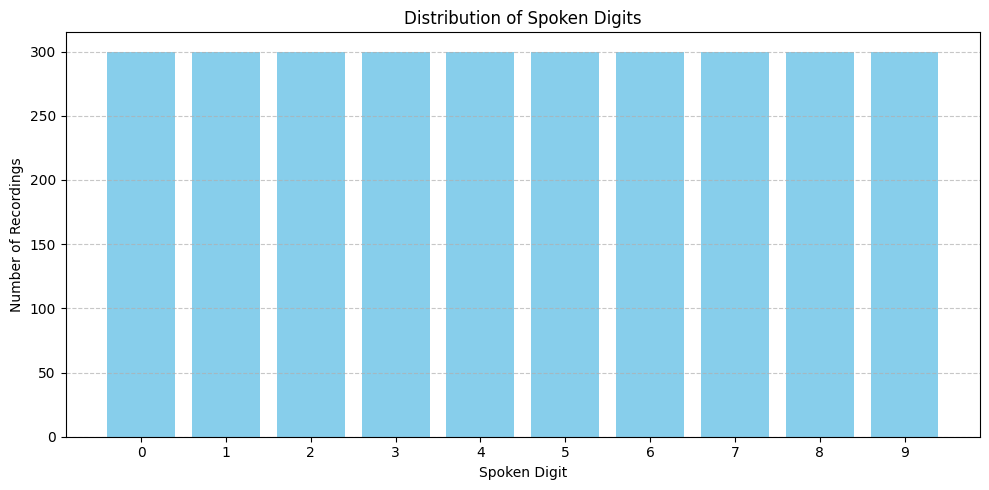

In [9]:
import matplotlib.pyplot as plt

# Plotting the distribution of spoken digits
plt.figure(figsize=(10, 5))
plt.bar(digit_distribution.keys(), digit_distribution.values(), color='skyblue')
plt.xlabel('Spoken Digit')
plt.ylabel('Number of Recordings')
plt.title('Distribution of Spoken Digits')
plt.xticks(list(digit_distribution.keys()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

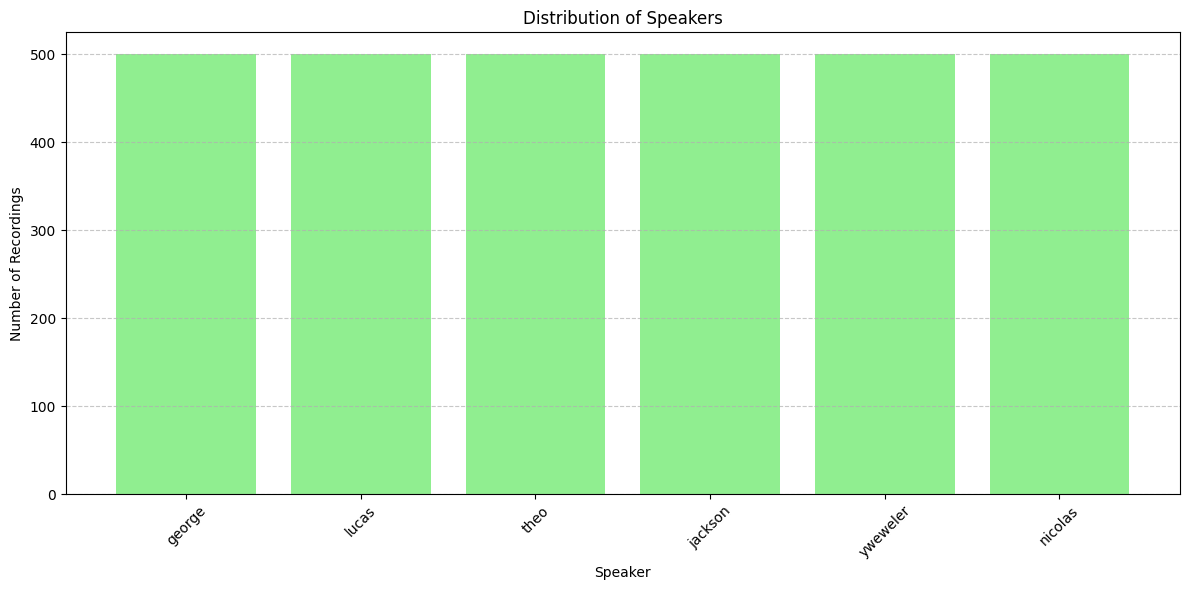

In [10]:
# Plotting the distribution of speakers
plt.figure(figsize=(12, 6))
plt.bar(speaker_distribution.keys(), speaker_distribution.values(), color='lightgreen')
plt.xlabel('Speaker')
plt.ylabel('Number of Recordings')
plt.title('Distribution of Speakers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

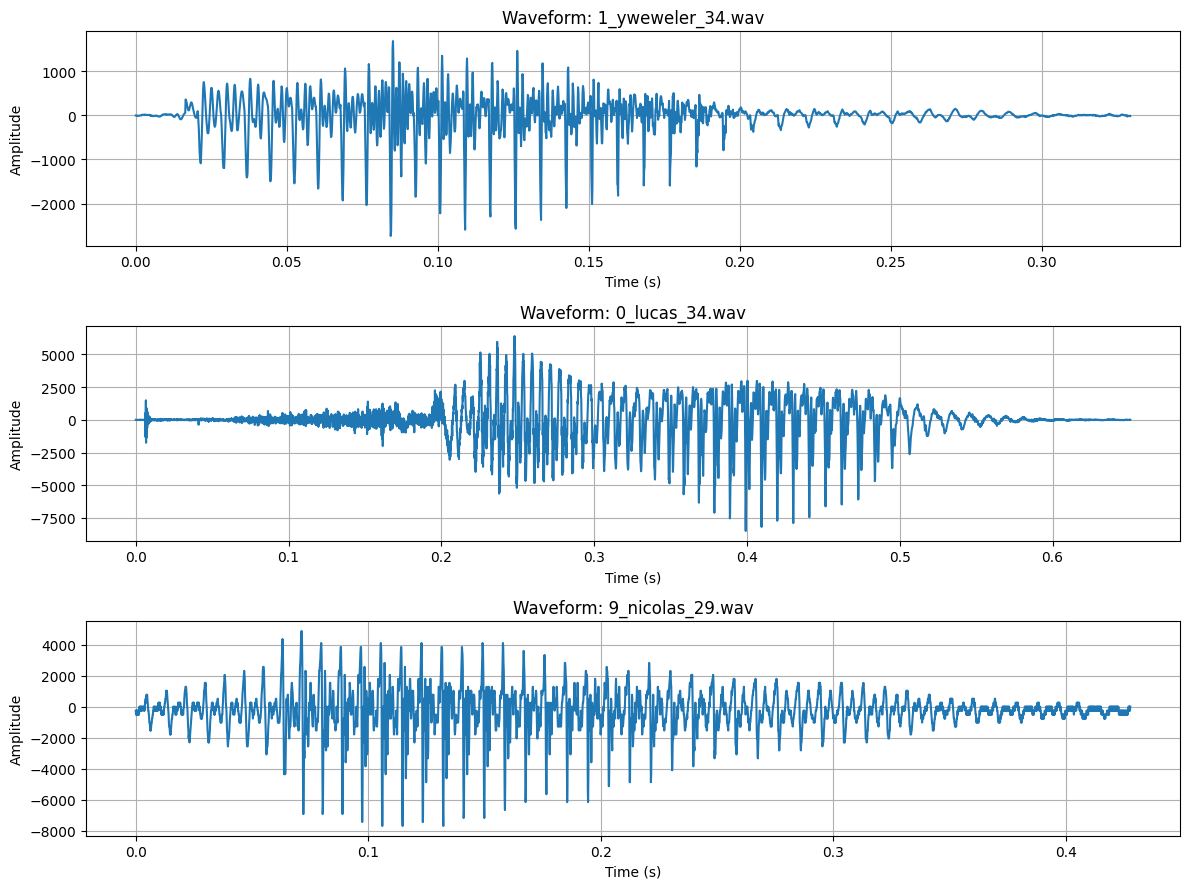

In [12]:
import numpy as np

def plot_waveform(file_path, ax, title="Waveform"):
    """Plots the waveform of an audio file."""
    with wave.open(file_path, 'rb') as wf:
        signal = wf.readframes(-1)
        signal = np.frombuffer(signal, dtype=np.int16)
        time = np.linspace(0, len(signal) / wf.getframerate(), num=len(signal))
    ax.plot(time, signal)
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.grid(True)

sample_files_viz = [audio_files[i] for i in [10, 1010, 2010]]

# Re-plotting the waveforms after importing numpy
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))
for i, file in enumerate(sample_files_viz):
    plot_waveform(os.path.join(recordings_path, file), axs[i], title=f"Waveform: {file}")

plt.tight_layout()
plt.show()

<ipython-input-13-de24444bae83>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


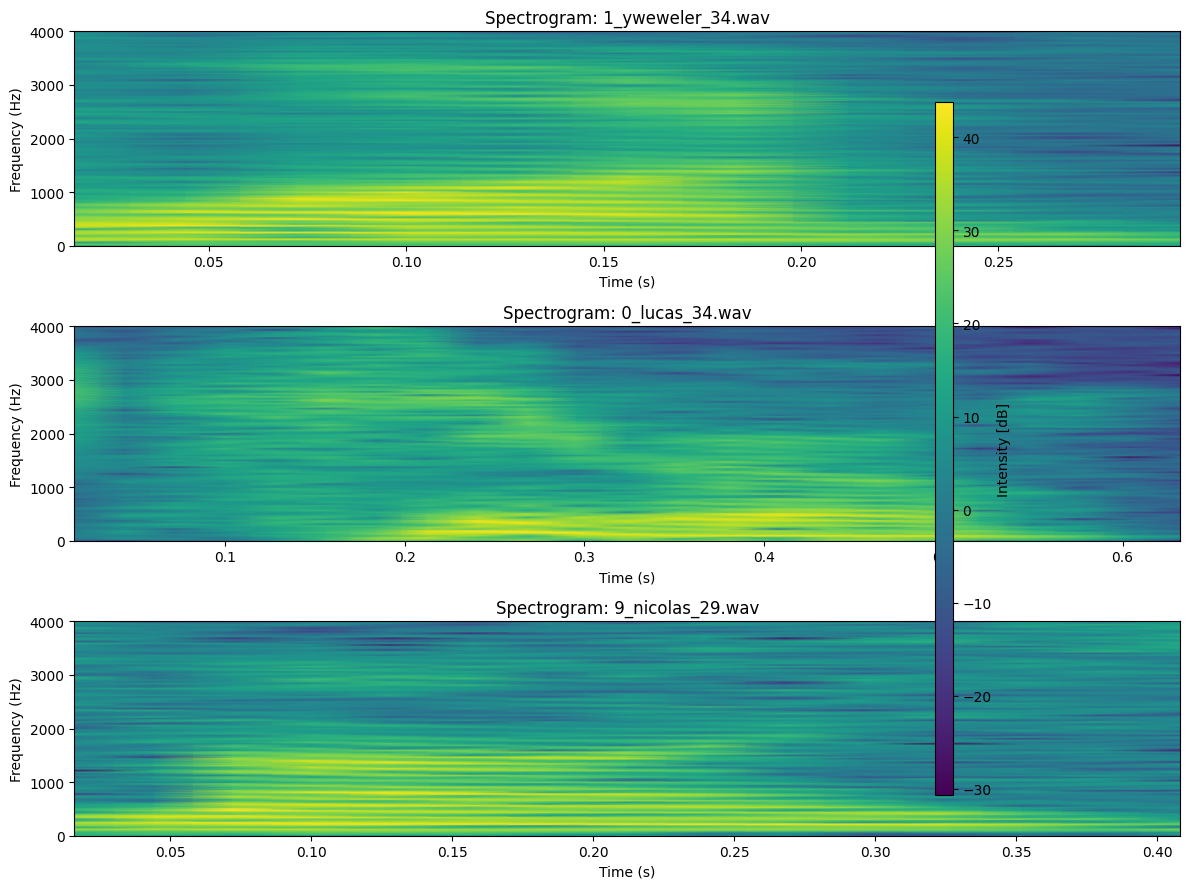

In [13]:
from scipy.signal import spectrogram

def plot_spectrogram_alternative_v2(file_path, ax, title="Spectrogram"):
    """Plots the spectrogram of an audio file using scipy (updated version)."""
    with wave.open(file_path, 'rb') as wf:
        signal = wf.readframes(-1)
        signal = np.frombuffer(signal, dtype=np.int16)
    f, t, Sxx = spectrogram(signal, wf.getframerate())
    im = ax.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    return im

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))
for i, file in enumerate(sample_files_viz):
    im = plot_spectrogram_alternative_v2(os.path.join(recordings_path, file), axs[i], title=f"Spectrogram: {file}")
fig.colorbar(im, ax=axs, label='Intensity [dB]', aspect=40)
plt.tight_layout()
plt.show()

In [14]:
def is_audio_corrupted(file_path):
    """Checks if an audio file might be corrupted."""
    try:
        with wave.open(file_path, 'rb') as wf:
            # Simply try reading the frames to see if there's an error
            wf.readframes(-1)
        return False
    except:
        return True

# Checking all audio files for potential corruption
corrupted_files = [file for file in audio_files if is_audio_corrupted(os.path.join(recordings_path, file))]

corrupted_files

[]

<ipython-input-18-f589c6470e03>:7: RuntimeWarning: overflow encountered in short_scalars
  y_scaled = (y - np.min(y)) / (np.max(y) - np.min(y))


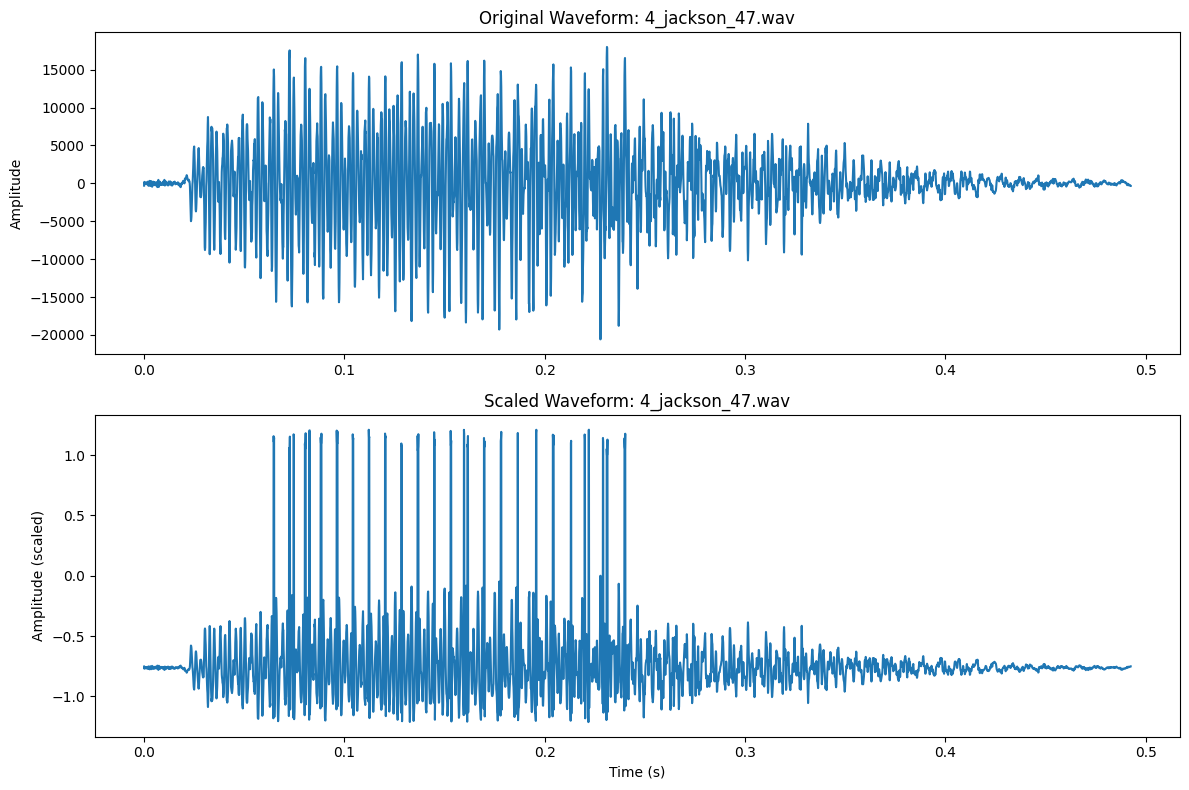

In [18]:
# Importing the required module and re-scaling the audio waveform
import scipy.io.wavfile as wav

def scale_audio(file_path):
    """Scales the audio waveform to be between 0 and 1."""
    sr, y = wav.read(file_path)
    y_scaled = (y - np.min(y)) / (np.max(y) - np.min(y))
    return sr, y_scaled

sample_file = audio_files[20]

# Scaling a sample audio clip
sr, scaled_audio = scale_audio(os.path.join(recordings_path, sample_file))

# Visualizing the original and scaled audio waveforms
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
time = np.linspace(0, len(scaled_audio) / sr, num=len(scaled_audio))

# Original audio waveform
with wave.open(os.path.join(recordings_path, sample_file), 'rb') as wf:
    original_signal = wf.readframes(-1)
    original_signal = np.frombuffer(original_signal, dtype=np.int16)
axs[0].plot(time, original_signal)
axs[0].set_title(f"Original Waveform: {sample_file}")
axs[0].set_ylabel('Amplitude')

# Scaled audio waveform
axs[1].plot(time, scaled_audio)
axs[1].set_title(f"Scaled Waveform: {sample_file}")
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude (scaled)')

plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Extracting features and labels from a subset of audio files
def extract_features_and_labels(file_paths):
    """Extracts raw audio waveforms and labels from a list of file paths."""
    features, labels = [], []
    for file_path in file_paths:
        sr, y = wav.read(file_path)
        features.append(y)
        labels.append(int(file_path.split('/')[-1].split('_')[0]))
    return features, labels

# Using a subset of the data for demonstration
subset_size = 200
subset_files = [os.path.join(recordings_path, audio_files[i]) for i in range(subset_size)]

# Extracting features and labels
X, y = extract_features_and_labels(subset_files)

# Padding sequences to have the same length
max_length = max([len(feature) for feature in X])
X_padded = np.array([np.pad(feature, (0, max_length - len(feature))) for feature in X])

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape

((160, 10504), (40, 10504))

In [20]:
# Initializing the Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Training the classifier
clf.fit(X_train, y_train)

# Predicting on the validation set
y_pred = clf.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.225

In [21]:
from joblib import dump, load

# Save the model to a file
dump(clf, 'random_forest_model.joblib')

# Load the model from the file
loaded_clf = load('random_forest_model.joblib')
loaded_clf

RandomForestClassifier(n_estimators=50, random_state=42)